<a href="https://colab.research.google.com/github/Aumatell/Python_deep_learning-Practical_introduction_with_keras_and_tensorflow/blob/main/5_Neural_Netorks_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load environment

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.7.0
2.7.0


5.1 Preload data from keras

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


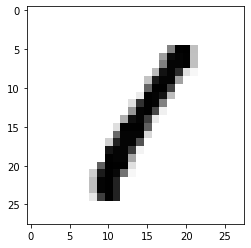

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[3], cmap=plt.cm.binary)

In [4]:
print(y_train[3])

1


In [5]:
print(x_train.ndim)

3


In [6]:
print(x_train.shape)

(60000, 28, 28)


In [7]:
print(x_train.dtype)

uint8


In [8]:
my_slice = x_train[1:100:,:]
print(my_slice.shape)

(99, 28, 28)


In [9]:
my_slice = x_train[1:100,0:28,0:28]
print(my_slice.shape)

(99, 28, 28)


In [10]:
my_slice = x_train[:,:14,14:]
print(my_slice.shape)

(60000, 14, 14)


In [11]:
my_slice = x_train[:,7:-7,7:-7]
print(my_slice.shape)

(60000, 14, 14)


5.2 Proessing of entry data for a neural network

In [12]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

In [13]:
x_train = x_train.reshape(60000,784)
x_test =x_test.reshape(10000,784)

In [14]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
print(y_test[0])

7


In [17]:
print(y_train[0])

5


In [18]:
print(y_train.shape)

(60000,)


In [19]:
print(x_test.shape)

(10000, 784)


In [20]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [21]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [22]:
print(y_train.shape)

(60000, 10)


In [23]:
print(y_test.shape)

(10000, 10)


5.3 Model Definition

In [24]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10,activation="sigmoid",input_shape=(784,)))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


5.4 Configuration del proceso de aprendizaje

In [26]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

5.5 Model training

In [27]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 1.8874 - accuracy: 0.5065
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2773 - accuracy: 0.7437
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9427 - accuracy: 0.8094
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7583 - accuracy: 0.8406
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6493 - accuracy: 0.8567


5.6 Model evaluation

In [28]:
test_loss, test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.5960 - accuracy: 0.8640


In [29]:
print("test acc : ",test_acc)

test acc :  0.8640000224113464


5.7 Predictions generation

TypeError: ignored

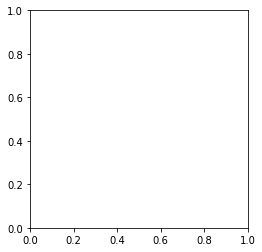

In [30]:
plt.imshow(x_test[1], cmap=plt.cm.binary)

In [31]:
predictions = model.predict(x_test)

In [32]:
np.argmax(predictions[11])

6

In [33]:
print(predictions[11])

[0.06765245 0.02543307 0.33573747 0.0206003  0.01793077 0.08668635
 0.36874184 0.00659335 0.0662436  0.0043808 ]


In [34]:
np.sum(predictions[11])

1.0

5.8 All steps together

Data preparation

In [35]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [36]:
fashion_mnist= keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) =  fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [37]:
class_names= ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [38]:
train_images = train_images.astype("float32")
test_images = test_images.astype("float32")

train_images = train_images / 255.0
test_images = test_images / 255.0

In [39]:
print("train_images.shape: ", train_images.shape)
print("len(train_labels): ",len(train_labels))

print("test_images.shape: ", test_images.shape)
print("len(test_labels): ",len(test_labels))

train_images.shape:  (60000, 28, 28)
len(train_labels):  60000
test_images.shape:  (10000, 28, 28)
len(test_labels):  10000


In [40]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

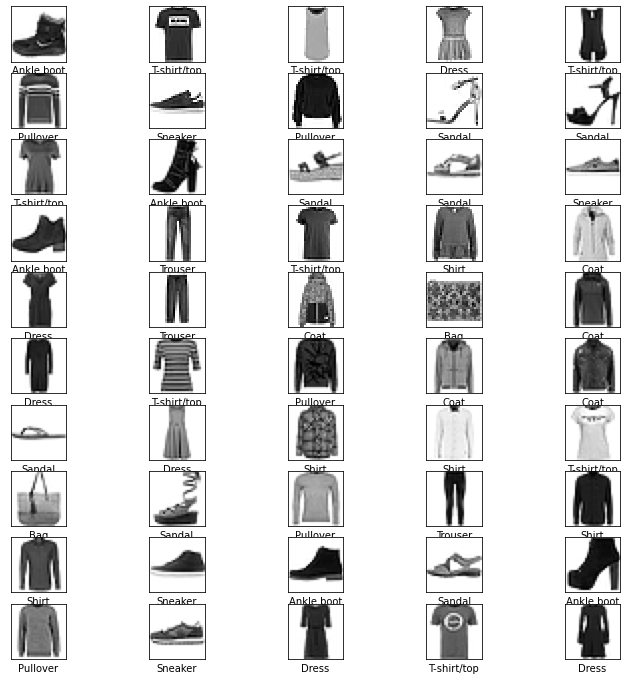

In [41]:
plt.figure(figsize=(12,12))
for i in range(50):
  plt.subplot(10,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

Definir modelo

In [42]:
model = tf.keras.Sequential()
model.add(keras.layers.Flatten(input_shape= (28,28)))
model.add(keras.layers.Dense(10,activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Model configuration

In [44]:
model.compile(optimizer="sgd",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

Model training

In [45]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8134 - accuracy: 0.4769
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2250 - accuracy: 0.6777
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9615 - accuracy: 0.7191
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8261 - accuracy: 0.7444
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7451 - accuracy: 0.7618


Evaluation and adjust 

In [46]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test acc: ", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.7322 - accuracy: 0.7564
Test acc:  0.7563999891281128


Using the model to make predictions

In [47]:
predictions = model.predict(test_images)

In [48]:
predictions[5]

array([2.99891196e-02, 8.67774367e-01, 7.74353556e-03, 3.79033834e-02,
       1.24062691e-02, 6.67463848e-03, 1.36338305e-02, 2.12941244e-02,
       2.25919648e-03, 3.21620610e-04], dtype=float32)

In [49]:
np.argmax(predictions[5])

1

In [50]:
test_labels[5]

1

In [51]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = "blue"
  else:
    color = "red"
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100+np.max(predictions_array),
                                       class_names[true_label]),
             color= color)
def plot_value_array( i, predictions_array, true_label):
  predictios_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = "#007700")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color("red")
  thisplot[true_label].set_color("black")

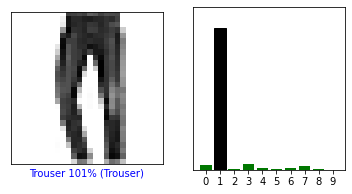

In [52]:
i=5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],test_labels)
plt.show()

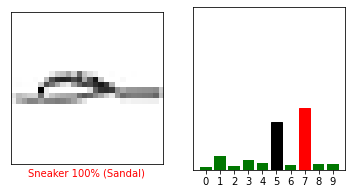

In [53]:
i=8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],test_labels)
plt.show()

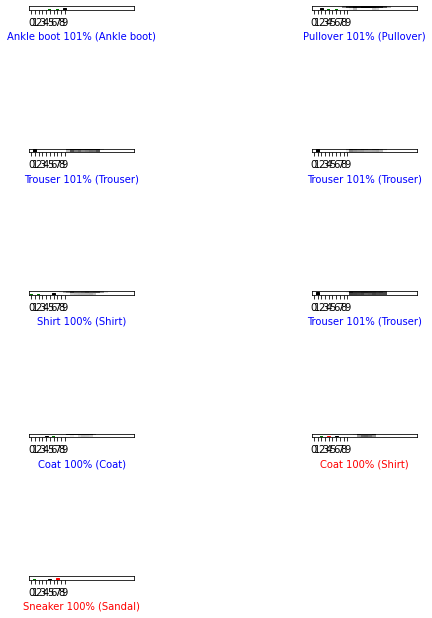

In [55]:
from urllib.request import ProxyDigestAuthHandler
num_rows = 7
num_cols = 2
num_images = num_rows+num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels,test_images)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Improve model performance



In [58]:
model = tf.keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(10, activation= "sigmoid"))
model.add(keras.layers.Dense(10, activation= "softmax"))
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy: ', test_acc)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0473 - accuracy: 0.6908
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5716 - accuracy: 0.8205
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4816 - accuracy: 0.8386
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4438 - accuracy: 0.8477
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.4439 - accuracy: 0.8448

Test accuracy:  0.8447999954223633
